# Python and Chess

In [16]:
# Import libraries
import random
from IPython.display import SVG, display, clear_output, HTML
import pandas as pd
import time
import chess.engine
from chess import svg, Piece
import chess.polyglot
import chess.svg

/var/folders/sl/c5pyww8j61j6_9_z4twp2ygc0000gn/T/ipykernel_12266/725189896.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


Ressources:
- https://jupyter.brynmawr.edu/services/public/dblank/CS371%20Cognitive%20Science/2016-Fall/Programming%20a%20Chess%20Player.ipynb
- https://colab.research.google.com/github/iAmEthanMai/chess-engine-model/blob/main/python_chess_engine.ipynb#scrollTo=tIks0yXVpEw2
- https://andreasstckl.medium.com/writing-a-chess-program-in-one-day-30daff4610ec

In [68]:
# Function to show all svgs in one row
piece_size = 100
list_pieces = ["R", "N", "B", "Q", "K", "B", "N", "R"]

def show_svg_row_pieces(svgs):

    # No wrap div for i in range(len(svgs)):
    no_wrap_div = '<div style="white-space: nowrap">{}{}{}{}{}{}{}{}</div>'
    display(HTML(no_wrap_div.format(*svgs)))


# Show board one normal and flipped next to it boards = svg.board(board, size=board_size), svg.board(board, flipped=True, size=board_size)
def show_svg_boards(board):
    board_size = 400
    # Take board as input and show it once normal and once mirrored with svg nowrap div
    no_wrap_div = '<div style="display: flex; justify-content: space-around; align-items: center; white-space: nowrap">{}{}</div>'
    display(HTML(no_wrap_div.format(svg.board(board, size=board_size), svg.board(board, flipped=True, size=board_size))))


# Show all pieces
show_svg_row_pieces([svg.piece(Piece.from_symbol(piece), size=piece_size) for piece in list_pieces])

In [18]:
# Functions
def rand_board(moves):
    ''' Returns a random board with a given number of moves'''
    board = chess.Board()
    for i in range(moves):
        rand_move = random.choice(list(board.legal_moves))
        # Print the move
        print(rand_move)
        board.push(rand_move)
    return print(board)  # Return printed or FEN board


# Return a random changing move
def rand_board_moves_df(moves):
    ''' Move given number of moves and return a DataFrame with the chosen move, the number of possible moves, and all moves'''
    board = chess.Board()
    data = []
    for i in range(moves):
        # Get all legal moves
        moves_list = []
        for move in board.legal_moves:
            moves_list.append(str(move))
        # Get a random move
        rand_move = random.choice(list(board.legal_moves))
        # Count the possible moves
        num_moves = len(moves_list)
        # Append data to list
        data.append([rand_move, num_moves, moves_list])
        # Make the move
        board.push(rand_move)

    # Return dataframe with the chosen move, the number of possible moves and all moves
    df = pd.DataFrame(data, columns=['Chosen Move', 'Number of Possible Moves', 'All Moves'])
    return df


def rand_board_moves(moves):
    ''' Move given number of moves and return a DataFrame with the chosen move, the number of possible moves, and all moves'''
    board = chess.Board()
    data = []
    for i in range(moves):
        # Get all legal moves
        moves_list = []
        for move in board.legal_moves:
            moves_list.append(str(move))
        # Get a random move
        rand_move = random.choice(list(board.legal_moves))
        # Count the possible moves
        num_moves = len(moves_list)
        # Append data to list
        data.append([rand_move, num_moves, moves_list])
        # Make the move
        board.push(rand_move)

    # Return dataframe with the chosen move, the number of possible moves and all moves
    df = pd.DataFrame(data, columns=['Chosen Move', 'Number of Possible Moves', 'All Moves'])
    return board

# find move with highest score
def board_status_print(board):
    try:
        last_move = board.peek()
    except:
        last_move = None
    fen = board.fen()
    is_check = board.is_check()
    is_checkmate = board.is_checkmate()
    is_stalemate = board.is_stalemate()
    is_insufficient_material = board.is_insufficient_material()
    legal_moves = list(board.legal_moves)
    num_legal_moves = len(legal_moves)
    status = board.status()

    summary = {
        "fen": fen,
        "turn": board.turn,
        "last_move": last_move,
        "is_check": is_check,
        "is_checkmate": is_checkmate,
        "is_stalemate": is_stalemate,
        "is_insufficient_material": is_insufficient_material,
        "num_legal_moves": num_legal_moves,
        "status": status,
        "castling_rights_white": board.has_castling_rights(chess.WHITE),
        "castling_rights_black": board.has_castling_rights(chess.BLACK),
        "pinned": board.is_pinned(chess.WHITE, chess.E2)
    }
    # Transform
    summary = f'''
Summary:

Turn: {board.turn}
FEN: {fen}
Is check: {is_check}
Is checkmate: {is_checkmate}
Is stalemate: {is_stalemate}
Is insufficient material: {is_insufficient_material}
Number of legal moves: {num_legal_moves}
Legal moves: {[str(move) for move in legal_moves]}
Status: {status}
Castling rights white: {board.has_castling_rights(chess.WHITE)}
Castling rights black: {board.has_castling_rights(chess.BLACK)}
Pinned: {board.is_pinned(chess.WHITE, chess.E2)}

'''
    return summary

c2c4
b8c6
d1b3
e7e6
g1f3
c6d4
b3b7
d8e7
f3e5
f7f6
r . b . k b n r
p Q p p q . p p
. . . . p p . .
. . . . N . . .
. . P n . . . .
. . . . . . . .
P P . P P P P P
R N B . K B . R


## A normal random Chess Game

In [69]:
# First move
board = chess.Board()
# Return a random changing move
rand_move = random.choice(list(board.legal_moves))
# Make the move
board.push(rand_move)

show_svg_boards(board)

In [70]:
# Legal moves
board.legal_moves
# board.legal_moves.count()

<LegalMoveGenerator at 0x1773b23b0 (Nh6, Nf6, Nc6, Na6, h6, g6, f6, e6, d6, c6, b6, a6, h5, g5, f5, e5, d5, c5, b5, a5)>

In [71]:
board.legal_moves
rand_move2 = random.choice(list(board.legal_moves))
board.push(rand_move2)
show_svg_boards(board)

# Random moves

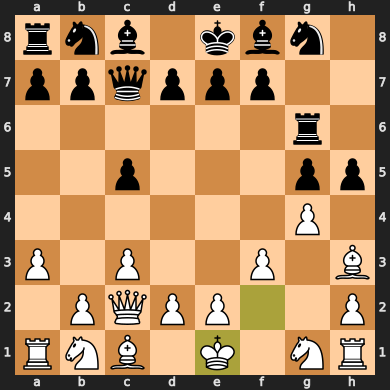

In [22]:
board = rand_board_moves(15)
board

In [23]:
# Board info
df = rand_board_moves_df(15)
df

,Chosen Move,Number of Possible Moves,All Moves
0,g1h3,20,"[g1h3, g1f3, b1c3, b1a3, h2h3, g2g3, f2f3, e2e..."
1,h7h6,20,"[g8h6, g8f6, b8c6, b8a6, h7h6, g7g6, f7f6, e7e..."
2,e2e4,20,"[h3g5, h3f4, h3g1, h1g1, b1c3, b1a3, g2g3, f2f..."
3,b7b6,19,"[h8h7, g8f6, b8c6, b8a6, g7g6, f7f6, e7e6, d7d..."
4,a2a4,29,"[h3g5, h3f4, h3g1, h1g1, f1a6, f1b5, f1c4, f1d..."
5,c8b7,20,"[h8h7, g8f6, c8b7, c8a6, b8c6, b8a6, g7g6, f7f..."
6,a1a3,30,"[h3g5, h3f4, h3g1, h1g1, f1a6, f1b5, f1c4, f1d..."
7,g7g6,24,"[h8h7, g8f6, d8c8, b8c6, b8a6, b7c8, b7c6, b7a..."
8,d1e2,35,"[h3g5, h3f4, h3g1, a3g3, a3f3, a3e3, a3d3, a3c..."
9,b7a6,24,"[h8h7, g8f6, f8g7, d8c8, b8c6, b8a6, b7c8, b7c..."


In [24]:
# Use the self defined function
board_status_print(board)


"\nSummary:\n\nTurn: False\nFEN: rnb1kbn1/ppqppp2/6r1/2p3pp/6P1/P1P2P1B/1PQPP2P/RNB1K1NR b q - 7 8\nIs check: False\nIs checkmate: False\nIs stalemate: False\nIs insufficient material: False\nNumber of legal moves: 37\nLegal moves: ['g8h6', 'g8f6', 'f8g7', 'f8h6', 'e8d8', 'b8c6', 'b8a6', 'c7d8', 'c7d6', 'c7c6', 'c7b6', 'c7e5', 'c7a5', 'c7f4', 'c7g3', 'c7h2', 'g6g7', 'g6h6', 'g6f6', 'g6e6', 'g6d6', 'g6c6', 'g6b6', 'g6a6', 'h5g4', 'f7f6', 'e7e6', 'd7d6', 'b7b6', 'a7a6', 'h5h4', 'c5c4', 'f7f5', 'e7e5', 'd7d5', 'b7b5', 'a7a5']\nStatus: 0\nCastling rights white: False\nCastling rights black: True\nPinned: False\n\n"

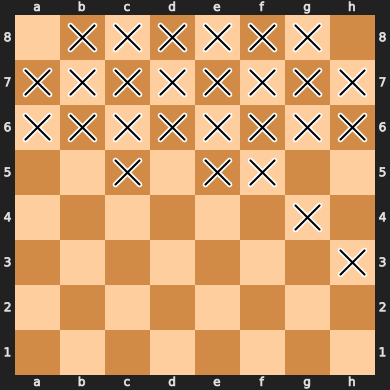

In [74]:
# Return attacked Squares
def covered_squares(board, color):
    covered = chess.SquareSet()
    for attacker in chess.SquareSet(board.occupied_co[color]):
        covered |= board.attacks(attacker)

    return covered

covered_white = covered_squares(board, chess.WHITE)
covered_black = covered_squares(board, chess.BLACK)
covered_black

In [97]:
# Show both boards with their own attacks
board = chess.Board()
board = rand_board_moves(15)

def show_svg_boards_covers(board):
    # Attackers
    covered = chess.SquareSet()
    for coverer in chess.SquareSet(board.occupied_co[chess.WHITE]):
        covered |= board.attacks(coverer)
    attacked_white = covered

    covered = chess.SquareSet()
    for coverer in chess.SquareSet(board.occupied_co[chess.BLACK]):
        covered |= board.attacks(coverer)
    attacked_black = covered



    # Visuals
    board_size = 400
    no_wrap_div = '<div style="display: flex; justify-content: space-around; align-items: center; white-space: nowrap">{}{}</div>'
    display(HTML(no_wrap_div.format(svg.board(board,
                                              size=board_size,
                                              fill=dict.fromkeys(attacked_white, "#00800080"),
                                              ),
                                    svg.board(board,
                                              flipped=True,
                                              size=board_size,
                                              fill=dict.fromkeys(attacked_black, "#00800080"),
                                              ))))

show_svg_boards_covers(board)

In [94]:
# check all squares for attackers and return a list of attackers for each square
def attackers(board, color):
    attackers = {}
    for square in chess.SQUARES:
        attackers[square] = board.attackers(color, square)
    return attackers

attackers(chess.Board(), chess.WHITE)

{0: SquareSet(0x0000_0000_0000_0000),
 1: SquareSet(0x0000_0000_0000_0001),
 2: SquareSet(0x0000_0000_0000_0008),
 3: SquareSet(0x0000_0000_0000_0010),
 4: SquareSet(0x0000_0000_0000_0008),
 5: SquareSet(0x0000_0000_0000_0010),
 6: SquareSet(0x0000_0000_0000_0080),
 7: SquareSet(0x0000_0000_0000_0000),
 8: SquareSet(0x0000_0000_0000_0001),
 9: SquareSet(0x0000_0000_0000_0004),
 10: SquareSet(0x0000_0000_0000_0008),
 11: SquareSet(0x0000_0000_0000_001e),
 12: SquareSet(0x0000_0000_0000_0078),
 13: SquareSet(0x0000_0000_0000_0010),
 14: SquareSet(0x0000_0000_0000_0020),
 15: SquareSet(0x0000_0000_0000_0080),
 16: SquareSet(0x0000_0000_0000_0202),
 17: SquareSet(0x0000_0000_0000_0500),
 18: SquareSet(0x0000_0000_0000_0a02),
 19: SquareSet(0x0000_0000_0000_1400),
 20: SquareSet(0x0000_0000_0000_2800),
 21: SquareSet(0x0000_0000_0000_5040),
 22: SquareSet(0x0000_0000_0000_a000),
 23: SquareSet(0x0000_0000_0000_4040),
 24: SquareSet(0x0000_0000_0000_0000),
 25: SquareSet(0x0000_0000_0000_000

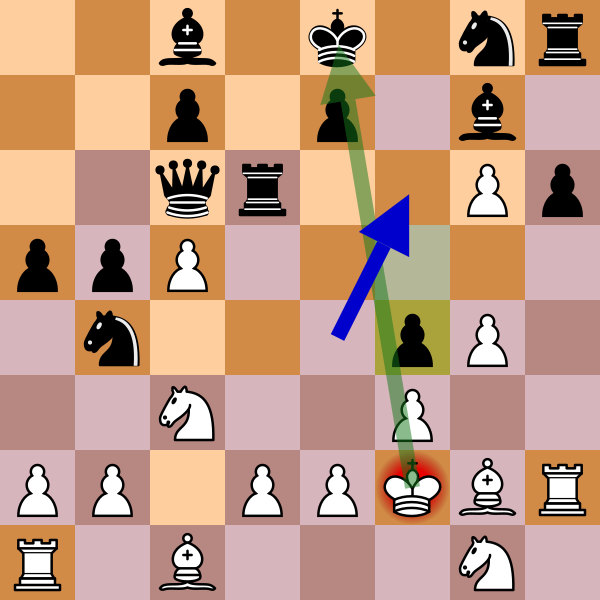

In [38]:
# Color squares if attacked by a piece
SVG(chess.svg.board(board,
                    orientation=chess.BLACK,
                    lastmove=board.peek(),
                    check=board.king(chess.WHITE),
                    arrows=[chess.svg.Arrow(board.king(chess.WHITE), board.king(chess.BLACK)), chess.svg.Arrow(chess.E4, chess.F6, color="#0000cccc")],
                    fill=dict.fromkeys(covered_squares(board, chess.WHITE), "#8080ff50"),
                    size=600,
                    coordinates=False,
                    flipped=True,
                    colors=dict(white="#ffffff", black="#000000")))

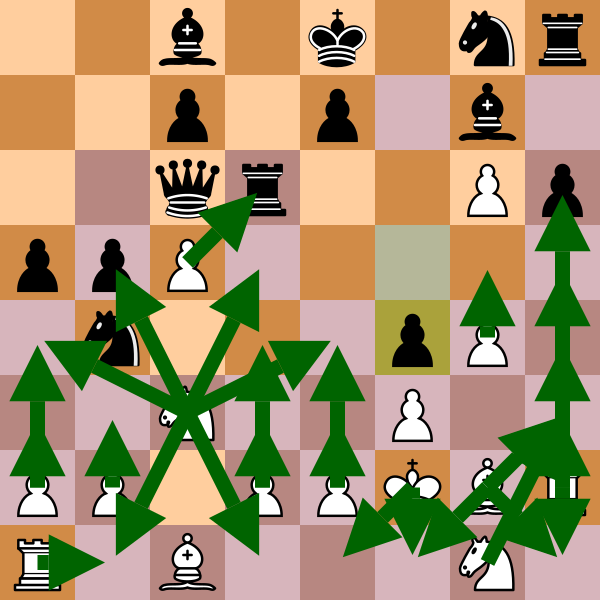

In [39]:
# Convert legal moves to arrows
def legal_moves_to_arrows(board):
    arrows = []
    for move in board.legal_moves:
        arrows.append(chess.svg.Arrow(move.from_square, move.to_square, color="#0064004D"))
    return arrows

current = legal_moves_to_arrows(board)

SVG(chess.svg.board(board,
                    orientation=chess.BLACK,
                    lastmove=board.peek(),
                    #check=board.king(chess.WHITE),
                    arrows=[arrw for arrw in current],
                    fill=dict.fromkeys(covered_squares(board, chess.WHITE), "#8080ff50"),
                    size=600,
                    coordinates=False,
                    flipped=True,
                    colors=dict(white="#ffffff", black="#000000"),
                    style="stroke-width: 8px;"))

In [40]:
# Legalmoves not
def legal_moves_not_attacked(board):
    legal_moves = []
    for move in board.legal_moves:
        legal_moves.append(move.to_square)
    not_attacked = []
    for square in chess.SQUARES:
        if square not in attacked_squares(board, chess.WHITE) and square in legal_moves:
            not_attacked.append(square)
    return not_attacked

legal_moves_not_attacked(board)

[27, 38]

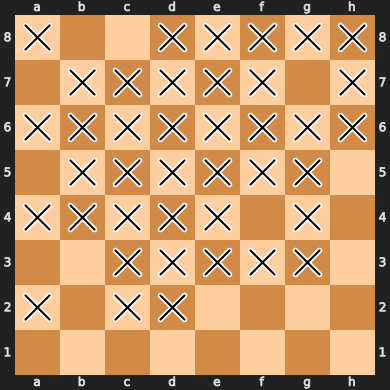

In [41]:
attacked_fields_white = covered_squares(board, chess.WHITE)
attacked_fields_white

attacked_fields_black = covered_squares(board, chess.BLACK)
attacked_fields_black

## Pieces their location and attacks

In [42]:
# List location of all pieces and their type and color
board = rand_board_moves(20)
pieces = []
for square in chess.SQUARES:
    piece = board.piece_at(square)
    if piece:
        pieces.append((piece.symbol(), piece.color,  piece.piece_type, square, chess.square_name(square)))

# Dataframe
board_df = pd.DataFrame(pieces, columns=["symbol", "color", "piece_type", "square", "square_name"])
# Define columns
board_df["color"] = board_df["color"].apply(lambda x: "white" if x else "black")
# Piece type long
board_df["piece_type_long"] = board_df["piece_type"].apply(lambda x: "pawn" if x == 1 else "knight" if x == 2 else "bishop" if x == 3 else "rook" if x == 4 else "queen" if x == 5 else "king")
# Add attacked column for all pieces that are attacked by white
board_df["attacked_by_white"] = board_df["square"].apply(lambda x: x in attacked_fields_white)
# Add attacked column for all pieces that are attacked by black
board_df["attacked_by_black"] = board_df["square"].apply(lambda x: x in attacked_fields_black)
# add attacked column for all pieces that are attacked by the oppposite color
board_df["attacked"] = board_df.apply(lambda x: x["attacked_by_white"] if x["color"] == "black" else x["attacked_by_black"], axis=1)
# add column for all attackers for the current piece and notation for the square
board_df["attackers_white_field"] = board_df["square"].apply(lambda x: attackers(board, chess.WHITE)[x])
# add column for all attackers for the current piece
board_df["attackers_black_field"] = board_df["square"].apply(lambda x: attackers(board, chess.BLACK)[x])
# Add column for the attackers piece type and color
board_df["attackers_white"] = board_df["attackers_white_field"].apply(lambda x: [(board.piece_at(attacker).symbol(), board.piece_at(attacker).color, board.piece_at(attacker).piece_type) for attacker in x])
board_df["attackers_black"] = board_df["attackers_black_field"].apply(lambda x: [(board.piece_at(attacker).symbol(), board.piece_at(attacker).color, board.piece_at(attacker).piece_type) for attacker in x])
board_df["attackers"] = board_df.apply(lambda x: x["attackers_white"] if x["color"] == "black" else x["attackers_black"], axis=1)
board_df["attackers_piece_type"] = board_df["attackers"].apply(lambda x: [attacker[2] for attacker in x])
board_df["attackers_piece_type_long"] = board_df["attackers_piece_type"].apply(lambda x: "pawn" if 1 in x else "knight" if 2 in x else "bishop" if 3 in x else "rook" if 4 in x else "queen" if 5 in x else "king" if 6 in x else "none")
# Add attack indicator that counts the attacks by the opposite and the own color and calculates the difference
board_df["attack_indicator"] = board_df.apply(lambda x: len(x["attackers_white"]) - len(x["attackers_black"]) if x["color"] == "white" else len(x["attackers_black"]) - len(x["attackers_white"]), axis=1)

board_df

,symbol,color,piece_type,square,square_name,piece_type_long,attacked_by_white,attacked_by_black,attacked,attackers_white_field,attackers_black_field,attackers_white,attackers_black,attackers,attackers_piece_type,attackers_piece_type_long,attack_indicator
0,R,white,4,0,a1,rook,False,False,False,(),(),[],[],[],[],none,0
1,K,white,6,4,e1,king,True,False,False,(0),(),"[(R, True, 4)]",[],[],[],none,1
2,B,white,3,5,f1,bishop,True,False,False,"(4, 33)",(),"[(K, True, 6), (Q, True, 5)]",[],[],[],none,2
3,N,white,2,6,g1,knight,True,False,False,(7),(),"[(R, True, 4)]",[],[],[],none,1
4,R,white,4,7,h1,rook,True,False,False,(),(),[],[],[],[],none,0
5,P,white,1,8,a2,pawn,True,True,True,"(0, 18)",(),"[(R, True, 4), (N, True, 2)]",[],[],[],none,2
6,P,white,1,10,c2,pawn,False,True,True,(),(),[],[],[],[],none,0
7,P,white,1,13,f2,pawn,False,False,False,(4),(),"[(K, True, 6)]",[],[],[],none,1
8,P,white,1,15,h2,pawn,False,False,False,(7),(),"[(R, True, 4)]",[],[],[],none,1
9,B,white,3,16,a3,bishop,True,False,False,(),(),[],[],[],[],none,0


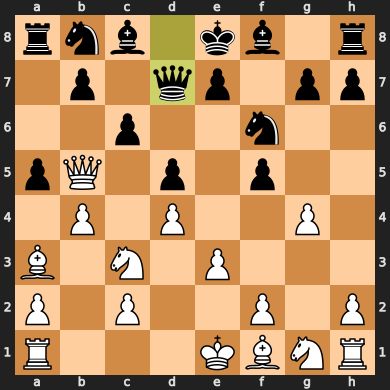

In [43]:
board

In [45]:
# Visualize board for every move in the game
for i in range(10):
    board.push(random.choice(list(board.legal_moves)))
    attacked_squares = attacked_squares(board, chess.WHITE)

    display(SVG(chess.svg.board(board,
                                orientation=chess.BLACK,
                                lastmove=board.peek(),
                                #check=board.king(chess.WHITE),
                                fill=dict.fromkeys(attacked_squares, "#8080ff50"),
                                size=400,
                                coordinates=False,
                                flipped=True,
                                colors=dict(white="#ffffff", black="#000000"),
                                style="stroke-width: 8px;")))
    clear_output(wait=True)
    time.sleep(1.0)

TypeError: 'SquareSet' object is not callable

## Polyglot opening book

In [84]:
# Polyglot opening book

board = chess.Board()
with chess.polyglot.open_reader("data/polyglot/performance.bin") as reader:
    for entry in reader.find_all(board):
        print(entry.move, entry.weight, entry.learn)

e2e4 1 486544384
d2d4 1 5120
c2c4 1 3825144832


## Stockfish engine

In [99]:
# stockfish engine
import chess.engine
import stockfish

board = chess.Board()
board.push_san("e4")
board.push_san("e5")
fen = board.fen()
stockfish = chess.engine.SimpleEngine.popen_uci("Stockfish-15.1_Mac_Apple_Silicon/stockfish-15.1_Mac_Apple_Silicon")

# Get best move
info = stockfish.analyse(board, chess.engine.Limit(time=0.1))
info

{'string': 'NNUE evaluation using nn-ad9b42354671.nnue enabled',
 'depth': 14,
 'seldepth': 20,
 'multipv': 1,
 'score': PovScore(Cp(+29), WHITE),
 'nodes': 92451,
 'nps': 915356,
 'hashfull': 36,
 'tbhits': 0,
 'time': 0.101,
 'pv': [Move.from_uci('g1f3'), Move.from_uci('g8f6')],
 'upperbound': True}

In [100]:
# polyglot opening book
import chess.polyglot
board = chess.Board()
with chess.polyglot.open_reader("data/polyglot/performance.bin") as reader:
    for entry in reader.find_all(board):
        print(entry.move, entry.weight, entry.learn)

e2e4 1 486544384
d2d4 1 5120
c2c4 1 3825144832
